<img src = "https://rec-data.kalibrr.com/www.kalibrr.ph/logos/SSYTB3EN2CEV9HZDWPPE4JHP8X2T7CNC6SDZST8Y-5d0b4f4b.png" width = 600>

**Kelompok 03 - Final Project 2 (Introduction to Python Kampus Merdeka)**<br>

Anggota Kelompok:

1. Aditya Gumilar<br>
PYTN-KS05-002

2. Muhammad Rezky Hamesi Akhyar<br>
PYTN-KS05-007

3. Muhammad Rizaldi<br>
PYTN-KS05-009



## **Project Overview**<br>


Project ini membahas tentang penerapan algoritma Supervised Machine Learning, pada kasus Classification. Algoritma model klasifikasi yang digunakan adalah Logistic Regression dan Support Vector Machine (SVM). Project ini bertujuan untuk mengevaluasi dan menerapkan konsep Logistic Regression dan SVM pada kasus klasifikasi menggunakan metode machine learning. Data yang digunakan berisi dokumentasi kondisi cuaca di Australia selama 10 tahun. Kolom `RainTomorrow` akan digunakan sebagai data target untuk melakukan prediksi. Jadi, objektif dari project ini adalah berdasarkan hasil observasi kondisi cuaca pada hari itu, dan akan memprediksi apakah besoknya akan turun hujan (Yes) atau tidak (No).

**Attribute Information** <br>

1. Date - Tanggal pada hari itu
2. Location - Lokasi, nama kota-kota di Australia
3. MinTemp - temperatur terendah hari itu dalam celcius
4. MaxTemp - temperatur tertinggi hari itu dalam celcius
5. Rainfall - jumlah curah hujan hari itu dalam mm
6. Evaporation - jumlah evaporasi dalam mm dari Class A pan selama 24 jam sebelum 6. jam 9 pagi hari itu
7. Sunshine - jumlah jam hari itu cerah dengan cahaya matahari
8. WindGustDir - arah kecepatan angin yang paling tinggi selama 24 jam sebelum jam 6. 12 malam hari itu
9. WindGustSpeed - kecepatan angin yang paling tinggi dalam km/jam selama 24 jam 6. sebelum jam 12 malam hari itu
10. WindDir9am - arah angin jam 9 pagi
11. WindDir3pm - arah angin jam 3 sore
12. WindSpeed9am - kecepatan angin jam 9 pagi dalam km/jam dihitung dari rata-rata 6. kecepatan angin 10 menit sebelum jam 3 sore
13. WindSpeed3pm - kecepatan angin jam 3 sore dalam km/jam dihitung dari rata-rata 6. kecepatan angin 10 menit sebelum jam 3 sore
14. Humidity9am - humiditas jam 9 pagi dalam persen
15. Humidity3pm - humiditas jam 3 sore dalam persen
16. Pressure9am - tekanan udara jam 9 pagi dalam hpa
17. Pressure3pm - tekanan udara jam 3 sore dalam hpa
18. Cloud9am - persentase langit yang tertutup awan jam 9 pagi. dihitung dalam 
19. Cloud3pm - persentase langit yang tertutup awan jam 3 sore
20. Temp9am - temperatur jam 9 pagi dalam celcius
21. Temp3pm - temperatur jam 3 sore dalam celcius
22. RainToday - apakah hari ini hujan: jika curah hujan 24 jam sebelum jam 9 pagi 6. melebihi 1mm, maka nilai ini adalah 1, jika tidak nilai nya 0
23. RainTomorrow - variable yang mau di prediksi <br>

**Logistic Regression**<br>
Konsep yang digunakan dalam Logistic Regression hampir sama dengan Linear Regression, namun nilai output Logistic Regression berada di antara 0 dan 1 (Binary Logistic Regression). Saat menerapkan Logistic Regression dari beberapa variabel dependen  pada kumpulan variabel independen  dengan  adalah jumlah prediktor, dimulai dengan nilai prediktor yang diketahui  dan respon aktual yang sesuai  untuk setiap observasi. Tujuannya adalah menemukan logistic regression function  sedemikian rupa sehingga predicted response  sedekat mungkin dengan actual response<br>

**Support Vector Machine (SVM)**<br>
Cara kerja SVM adalah membangun hyperplane dalam multidimensional space untuk memisahkan kelas yang berbeda. SVM menghasilkan hyperplane optimal secara berulang, yang digunakan untuk meminimalkan kesalahan. Ide inti dari SVM adalah menemukan Maximum Marginal Hyperplane (MMH) yang paling baik membagi dataset menjadi beberapa kelas atau dalam kata lain, memisahkan kumpulan data yang diberikan dengan cara terbaik yaitu memilih hyperplane dengan kemungkinan margin maksimum antara support vectors dalam dataset yang diberikan. Hyperplane adalah decision plane yang memisahkan antara sekumpulan objek yang memiliki kelas yang berbeda, sedangkan Support Vector adalah data points yang paling dekat dengan hyperplane. Selain itu Margin adalah celah antara dua garis pada poin kelas tersebut.

## Import Library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import svm
import pickle
import warnings
warnings.filterwarnings('ignore')

from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.svm import SVC
from sklearn.svm import LinearSVC

from sklearn.metrics import classification_report, confusion_matrix,plot_confusion_matrix, accuracy_score, precision_score, f1_score, recall_score
from sklearn import metrics

from time import time
from six import StringIO
from sklearn import tree
from IPython.display import Image

plt.style.use("ggplot")

## Load Dataset

Memanggil dataset yang akan digunakan

In [2]:
df=pd.read_csv("https://raw.githubusercontent.com/adityagum/dataset/main/weatherAUS.csv")
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [3]:
# Memanggil 5 data terakhir
df.tail()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No
145459,2017-06-25,Uluru,14.9,NaN,0.0,NaN,NaN,NaN,NaN,ESE,...,62.0,36.0,1020.2,1017.9,8.0,8.0,15.0,20.9,No,NaN


In [4]:
# Memeriksa dimensi (Baris dan Kolom)
df.shape

(145460, 23)

In [5]:
# Menampilkan informasi mengenai tipe data, kolom, jumlah missing values yang ada pada dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

Berdasarkan keterangan di atas, diketahui bahwa dataset ini terdiri dari 145460 baris dan 23 kolom. Terdapat 16 kolom yang memiliki tipe *Numeric* dan 7 kolom dengan tipe *object/Category*.

In [6]:
# Memeriksa apakah ada duplikasi dalam data
df.duplicated().sum()

0

In [7]:
# Melihat jumlah missing value pada setiap kolom (berdasarkan presentase)
mv =pd.DataFrame( { 'Count': df.isnull().sum(),
                    'Presentase (%)' : round((df.isnull().sum()/df.shape[0])*100) })
mv

,Count,Presentase (%)
Date,0,0.0
Location,0,0.0
MinTemp,1485,1.0
MaxTemp,1261,1.0
Rainfall,3261,2.0
Evaporation,62790,43.0
Sunshine,69835,48.0
WindGustDir,10326,7.0
WindGustSpeed,10263,7.0
WindDir9am,10566,7.0


Karena data yang digunakan masih bersifat mentah dan masih terdapat beberapa missing values di setiap column, maka akan dilakukan data cleaning dan data preprocessing. Tujuan dilakukan keduanya adalah agar data yang kita gunakan menjadi berkualitas dan bisa masuk kedalam tahap klasifikasi

## Data Cleaning

Bagian ini berisi proses penyiapan data berupa *data cleaning* sebelum dilakukan eksplorasi data lebih lanjut. Proses ini bertujuan untuk melihat apakah masih terdapat *missing values* pada data yang kita gunakan

In [8]:
mv[mv['Presentase (%)']>30]

,Count,Presentase (%)
Evaporation,62790,43.0
Sunshine,69835,48.0
Cloud9am,55888,38.0
Cloud3pm,59358,41.0


Dari ke-empat column yang memiliki nilai presentase missing values lebih dari 30%, maka column tersebut akan di drop untuk menghindari banyaknya jumlah data yang hilang 

In [9]:
df.drop(columns=['Evaporation','Sunshine','Cloud9am','Cloud3pm'],inplace=True)
df.shape

(145460, 19)

Text(0.5, 1.0, 'Missing Value in Each Column')

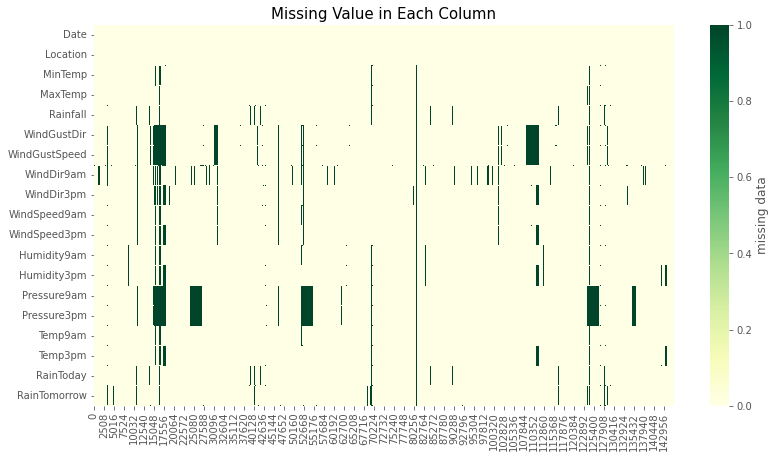

In [10]:
#visualisasi missing value
plt.figure(figsize=(13,7))
sns.heatmap(df.isnull().transpose(),
           cmap='YlGn',
           cbar_kws={'label':'missing data'})
plt.title('Missing Value in Each Column', fontsize=15)

In [11]:
# Melihat jumlah missing value pada setiap kolom (berdasarkan presentase)
mv =pd.DataFrame( { 'Count': df.isnull().sum(),
                    'Presentase (%)' : round((df.isnull().sum()/df.shape[0])*100) })
mv

,Count,Presentase (%)
Date,0,0.0
Location,0,0.0
MinTemp,1485,1.0
MaxTemp,1261,1.0
Rainfall,3261,2.0
WindGustDir,10326,7.0
WindGustSpeed,10263,7.0
WindDir9am,10566,7.0
WindDir3pm,4228,3.0
WindSpeed9am,1767,1.0


Berdasarkan tabel presentase missing values diatas, masih terdapat missing values di setiap kolom, kecuali kolom date dan location. Oleh karena itu, missing values pada kolom yang bertipe data numeric akan di isi menggunakan teknik moving average.
Moving Average adalah teknik untuk menghitung rata-rata data selama periode waktu tertentu

In [12]:
# Memisahkan kolom numerik
numerical = [cols for cols in df.columns if df[cols].dtypes=='float64']

# Mengisi missing values setiap kolom dengan moving average (rolling)
for cols in numerical:
    if df[cols].isnull().sum() != 0:
        while True:
            df[cols] = df[cols].fillna(df[cols].rolling(min_periods = 1, window = 7, center=True).mean())
            if df[cols].isnull().sum() == 0:
                    break

In [13]:
# Melihat jumlah missing value pada setiap kolom (berdasarkan presentase)
mv =pd.DataFrame( { 'Count': df.isnull().sum(),
                    'Presentase (%)' : round((df.isnull().sum()/df.shape[0])*100) })
mv

,Count,Presentase (%)
Date,0,0.0
Location,0,0.0
MinTemp,0,0.0
MaxTemp,0,0.0
Rainfall,0,0.0
WindGustDir,10326,7.0
WindGustSpeed,0,0.0
WindDir9am,10566,7.0
WindDir3pm,4228,3.0
WindSpeed9am,0,0.0


In [14]:
# Menghilangkan missing values pada kolom RainToday, RainTomorrow, WindGustDir, WindDir9am, WindDir3pm
df.dropna(subset=['RainToday','RainTomorrow', 'WindGustDir','WindDir9am','WindDir3pm'], axis=0, inplace=True)

In [15]:
# Melihat jumlah missing value pada setiap kolom (berdasarkan presentase)
mv =pd.DataFrame( { 'Count': df.isnull().sum(),
                    'Presentase (%)' : round((df.isnull().sum()/df.shape[0])*100) })
mv

,Count,Presentase (%)
Date,0,0.0
Location,0,0.0
MinTemp,0,0.0
MaxTemp,0,0.0
Rainfall,0,0.0
WindGustDir,0,0.0
WindGustSpeed,0,0.0
WindDir9am,0,0.0
WindDir3pm,0,0.0
WindSpeed9am,0,0.0


Berdasarkan tabel diatas, missing values di setiap column sudah teratasi. Selanjutnya akan masuk ke tahap lebih lanjut

In [16]:
# Mengubah value pada kolom raintomorrow dan raintoday
df['RainTomorrow'] = df['RainTomorrow'].map({'Yes': 1, 'No': 0})
df['RainToday'] = df['RainToday'].map({'Yes': 1, 'No': 0})

## Eksplorasi Data Analysis

Selanjutnya eksplorasi data dilakukan untuk memahami data lebih dalam, mengetahui variabel atau fitur apa saja yang diduga berpengaruh dalam prediksi variabel targetnya, dan memeriksa statistik deskriptif serta distribusinya untuk kepentingan prediksi model.

In [17]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,0,0
1,2008-12-02,Albury,7.4,25.1,0.0,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,0,0
2,2008-12-03,Albury,12.9,25.7,0.0,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,0,0
3,2008-12-04,Albury,9.2,28.0,0.0,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,0,0
4,2008-12-05,Albury,17.5,32.3,1.0,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,0,0


### Frekuensi nilai pada kolom `RainTomorrow`

In [18]:
print(df.RainTomorrow.value_counts())
print(df.RainToday.value_counts())

0    96318
1    27392
Name: RainTomorrow, dtype: int64
0    95954
1    27756
Name: RainToday, dtype: int64


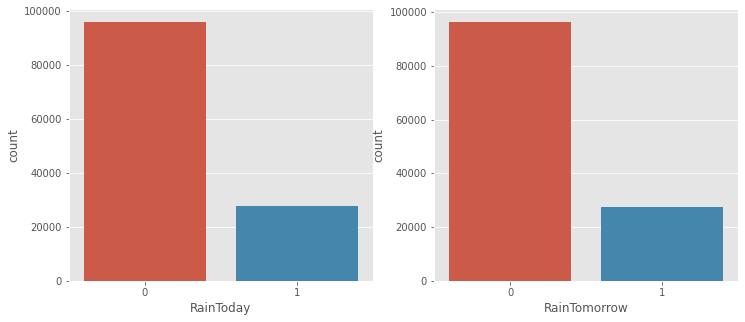

In [19]:
# Distribusi 
fig, ax = plt.subplots(1,2, figsize=(12, 5))
sns.countplot(df.RainToday, ax=ax[0])
sns.countplot(df.RainTomorrow, ax=ax[1])
fig.show()

Berdasarkan visualisasi plot diatas, diketahui bahwa kelas 0 (No) memiliki nilai yang lebih banyak daripada kelas 1 (Yes). Artinya, jumlah hari yang tidak turun hujan lebih banyak dibandingkan jumlah hari yang turun hujan, jika dilihat berdasarkan catatan kondisi cuacanya.

### Distribusi `Location` berdasarkan terjadinya hujan atau tidak

In [20]:
# Distribusi Raintoday berdasarkan Lokasi
df_loc = df.groupby(by='Location').sum()
df_loc = df_loc[['RainToday']]
df_loc.head()

,RainToday
Location,
Adelaide,635
Albury,558
AliceSprings,231
BadgerysCreek,524
Ballarat,750


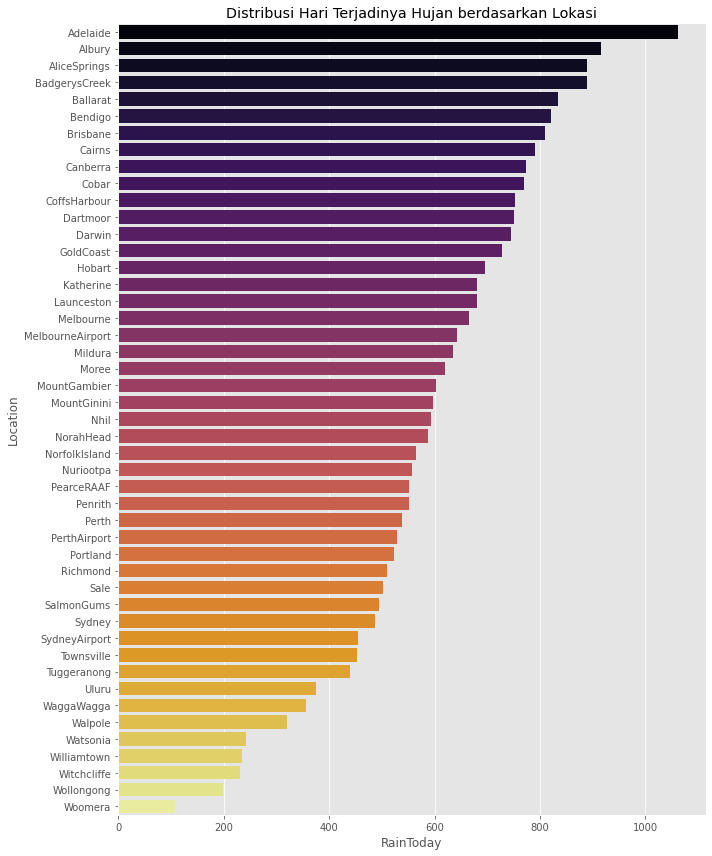

In [21]:
plt.figure(figsize=(10, 12))
sns.barplot(x='RainToday', 
            y=df_loc.index, 
            data=df_loc.sort_values('RainToday', ascending=False), 
            orient='h',palette='inferno'
           )

plt.title('Distribusi Hari Terjadinya Hujan berdasarkan Lokasi')
plt.tight_layout()

Berdasarkan visualisasi diatas, setiap lokasi memiliki jumlah hari yang berbeda ketika turunnya hujan. Sehingga dapat disimpulkan bahwa setiap lokasi juga menjadi faktor atau mempengaruhi turunnya hujan.

### Korelasi data numeric dengan data target

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 123710 entries, 0 to 145458
Data columns (total 19 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           123710 non-null  object 
 1   Location       123710 non-null  object 
 2   MinTemp        123710 non-null  float64
 3   MaxTemp        123710 non-null  float64
 4   Rainfall       123710 non-null  float64
 5   WindGustDir    123710 non-null  object 
 6   WindGustSpeed  123710 non-null  float64
 7   WindDir9am     123710 non-null  object 
 8   WindDir3pm     123710 non-null  object 
 9   WindSpeed9am   123710 non-null  float64
 10  WindSpeed3pm   123710 non-null  float64
 11  Humidity9am    123710 non-null  float64
 12  Humidity3pm    123710 non-null  float64
 13  Pressure9am    123710 non-null  float64
 14  Pressure3pm    123710 non-null  float64
 15  Temp9am        123710 non-null  float64
 16  Temp3pm        123710 non-null  float64
 17  RainToday      123710 non-nul

In [23]:
le = LabelEncoder()
# df.Location = le.fit_transform(df.Location)
df.WindGustDir = le.fit_transform(df.WindGustDir)
df.WindDir9am = le.fit_transform(df.WindDir9am)
df.WindDir3pm = le.fit_transform(df.WindDir3pm)

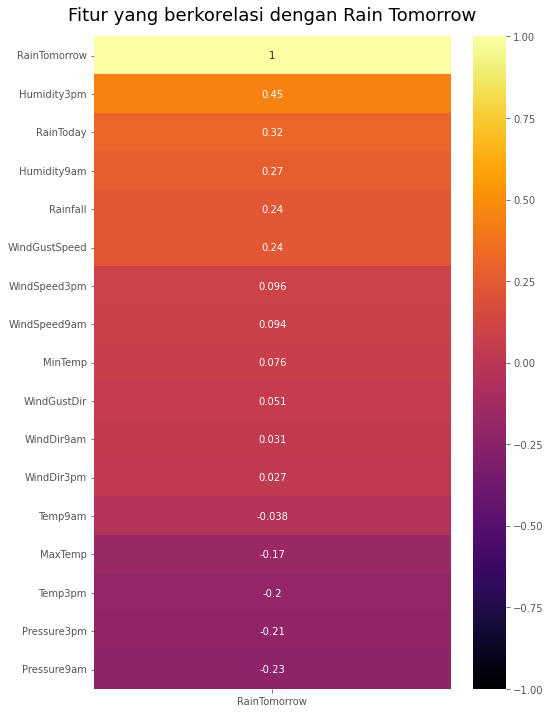

In [24]:
# Melihat korelasi antara data feature dengan data target
plt.figure(figsize=(8, 12))
hm1 = sns.heatmap(df.corr()[['RainTomorrow']].sort_values(by='RainTomorrow', ascending=False), vmin=-1, vmax=1, annot=True, cmap='inferno')
hm1.set_title('Fitur yang berkorelasi dengan Rain Tomorrow', fontdict={'fontsize':18}, pad=16);

## Data Preprocessing

Proses ini dilakukan untuk penyiapan data untuk proses pelatihan model prediksi klasifikasi.

In [25]:
df = df.drop(columns = ['Temp9am', 'MaxTemp', 'Temp3pm', 'Pressure3pm', 'Pressure9am'])
# 'WindSpeed3pm', 'WindSpeed9am', "MinTemp", "WindGustDir", 'WindDir9am', 'WindDir3pm'

In [26]:
# Memeriksa kembali ringkasan dari dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 123710 entries, 0 to 145458
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           123710 non-null  object 
 1   Location       123710 non-null  object 
 2   MinTemp        123710 non-null  float64
 3   Rainfall       123710 non-null  float64
 4   WindGustDir    123710 non-null  int64  
 5   WindGustSpeed  123710 non-null  float64
 6   WindDir9am     123710 non-null  int64  
 7   WindDir3pm     123710 non-null  int64  
 8   WindSpeed9am   123710 non-null  float64
 9   WindSpeed3pm   123710 non-null  float64
 10  Humidity9am    123710 non-null  float64
 11  Humidity3pm    123710 non-null  float64
 12  RainToday      123710 non-null  int64  
 13  RainTomorrow   123710 non-null  int64  
dtypes: float64(7), int64(5), object(2)
memory usage: 18.2+ MB


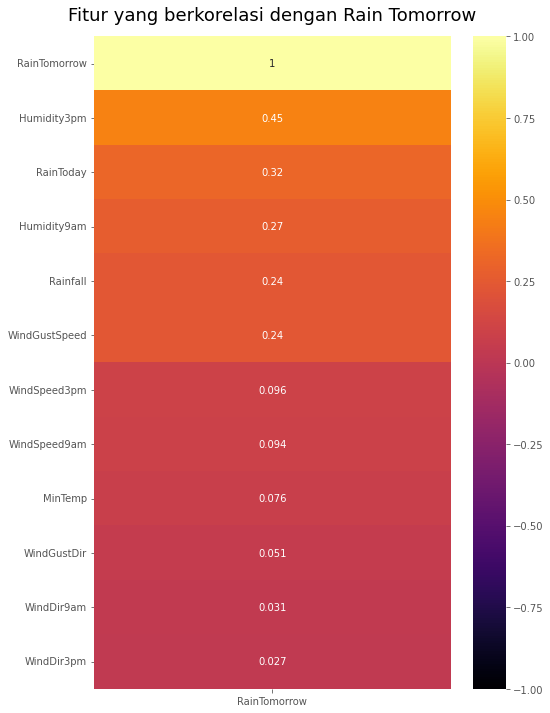

In [27]:
# Melihat korelasi antara data feature dengan data target
plt.figure(figsize=(8, 12))
hm2 = sns.heatmap(df.corr()[['RainTomorrow']].sort_values(by='RainTomorrow', ascending=False), vmin=-1, vmax=1, annot=True, cmap='inferno')
hm2.set_title('Fitur yang berkorelasi dengan Rain Tomorrow', fontdict={'fontsize':18}, pad=16);

In [28]:
# Reset index setelah dilakukan dropping dengan tujuan agar index berurutan
df.reset_index(drop=True, inplace=True)

### Standarisasi data

StandardScaler adalah class dari sklearn untuk melakukan normalisasi data agar data yang digunakan tidak memiliki penyimpangan yang besar.

In [29]:
columns = ['MinTemp', 'Rainfall', 'WindGustDir', 'WindGustSpeed',
       'WindDir9am', 'WindDir3pm', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm', 'RainToday', 'RainTomorrow','Location']
       
data = df[columns]
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123710 entries, 0 to 123709
Data columns (total 13 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   MinTemp        123710 non-null  float64
 1   Rainfall       123710 non-null  float64
 2   WindGustDir    123710 non-null  int64  
 3   WindGustSpeed  123710 non-null  float64
 4   WindDir9am     123710 non-null  int64  
 5   WindDir3pm     123710 non-null  int64  
 6   WindSpeed9am   123710 non-null  float64
 7   WindSpeed3pm   123710 non-null  float64
 8   Humidity9am    123710 non-null  float64
 9   Humidity3pm    123710 non-null  float64
 10  RainToday      123710 non-null  int64  
 11  RainTomorrow   123710 non-null  int64  
 12  Location       123710 non-null  object 
dtypes: float64(7), int64(5), object(1)
memory usage: 12.3+ MB


In [30]:
sc = StandardScaler()
sc.fit(data.drop(['RainToday','RainTomorrow','Location'], axis=1))
scaled_features = sc.transform(data.drop(['RainToday','RainTomorrow','Location'], axis=1))
df_feat = pd.DataFrame(scaled_features,columns = data.columns[:-3])
df_feat.head()

,MinTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm
0,0.154455,-0.208215,1.130298,0.247578,1.259196,1.348222,0.600477,0.562994,0.174326,-1.371087
1,-0.787556,-0.278572,1.344664,0.247578,-0.278890,1.564755,-1.325551,0.329649,-1.234497,-1.228100
2,0.075954,-0.278572,1.559029,0.396959,1.259196,1.564755,0.480100,0.796339,-1.547568,-0.989788
3,-0.504952,-0.278572,-0.798992,-1.246232,0.380290,-1.683238,-0.482914,-1.187093,-1.182318,-1.657062
4,0.798163,-0.161311,1.130298,0.023507,-1.377522,-0.167508,-0.964421,0.096304,0.748291,-0.846800


In [31]:
# Menambahkan kolom Location dan RainToday
df_feat['Location'] = data.Location
df_feat['RainToday'] = data.RainToday

df_feat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123710 entries, 0 to 123709
Data columns (total 12 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   MinTemp        123710 non-null  float64
 1   Rainfall       123710 non-null  float64
 2   WindGustDir    123710 non-null  float64
 3   WindGustSpeed  123710 non-null  float64
 4   WindDir9am     123710 non-null  float64
 5   WindDir3pm     123710 non-null  float64
 6   WindSpeed9am   123710 non-null  float64
 7   WindSpeed3pm   123710 non-null  float64
 8   Humidity9am    123710 non-null  float64
 9   Humidity3pm    123710 non-null  float64
 10  Location       123710 non-null  object 
 11  RainToday      123710 non-null  int64  
dtypes: float64(10), int64(1), object(1)
memory usage: 11.3+ MB


### Mengubah baris value pada `Location` menjadi kolom

In [32]:
df2 = pd.get_dummies(df_feat, columns=['Location'])
df2.head()

,MinTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,Location_Townsville,Location_Tuggeranong,Location_Uluru,Location_WaggaWagga,Location_Walpole,Location_Watsonia,Location_Williamtown,Location_Witchcliffe,Location_Wollongong,Location_Woomera
0,0.154455,-0.208215,1.130298,0.247578,1.259196,1.348222,0.600477,0.562994,0.174326,-1.371087,...,0,0,0,0,0,0,0,0,0,0
1,-0.787556,-0.278572,1.344664,0.247578,-0.278890,1.564755,-1.325551,0.329649,-1.234497,-1.228100,...,0,0,0,0,0,0,0,0,0,0
2,0.075954,-0.278572,1.559029,0.396959,1.259196,1.564755,0.480100,0.796339,-1.547568,-0.989788,...,0,0,0,0,0,0,0,0,0,0
3,-0.504952,-0.278572,-0.798992,-1.246232,0.380290,-1.683238,-0.482914,-1.187093,-1.182318,-1.657062,...,0,0,0,0,0,0,0,0,0,0
4,0.798163,-0.161311,1.130298,0.023507,-1.377522,-0.167508,-0.964421,0.096304,0.748291,-0.846800,...,0,0,0,0,0,0,0,0,0,0


In [33]:
df_final = df2.copy()
df_final

,MinTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,Location_Townsville,Location_Tuggeranong,Location_Uluru,Location_WaggaWagga,Location_Walpole,Location_Watsonia,Location_Williamtown,Location_Witchcliffe,Location_Wollongong,Location_Woomera
0,0.154455,-0.208215,1.130298,0.247578,1.259196,1.348222,0.600477,0.562994,0.174326,-1.371087,...,0,0,0,0,0,0,0,0,0,0
1,-0.787556,-0.278572,1.344664,0.247578,-0.278890,1.564755,-1.325551,0.329649,-1.234497,-1.228100,...,0,0,0,0,0,0,0,0,0,0
2,0.075954,-0.278572,1.559029,0.396959,1.259196,1.564755,0.480100,0.796339,-1.547568,-0.989788,...,0,0,0,0,0,0,0,0,0,0
3,-0.504952,-0.278572,-0.798992,-1.246232,0.380290,-1.683238,-0.482914,-1.187093,-1.182318,-1.657062,...,0,0,0,0,0,0,0,0,0,0
4,0.798163,-0.161311,1.130298,0.023507,-1.377522,-0.167508,-0.964421,0.096304,0.748291,-0.846800,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123705,-1.399863,-0.278572,-1.656455,-0.723399,-1.157796,-1.683238,-0.001407,-0.720403,-0.451817,-1.132775,...,0,0,1,0,0,0,0,0,0,0
123706,-1.509764,-0.278572,-1.656455,-0.723399,0.380290,-1.466705,-0.242161,-0.953748,-0.869246,-1.275762,...,0,0,1,0,0,0,0,0,0,0
123707,-1.384163,-0.278572,-0.370261,-1.395613,0.380290,-1.033640,-0.242161,-1.187093,-0.608353,-1.418749,...,0,0,1,0,0,0,0,0,0,0
123708,-1.101559,-0.278572,-1.013358,-0.275255,0.380290,1.348222,-0.723668,-1.187093,-0.764889,-1.275762,...,0,0,1,0,0,0,0,0,0,0


## Modeling

### Splitting dataset

Membagi data training dan testing dengan rasio 80:20

In [34]:
X = df_final
y = df.RainTomorrow

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [35]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(98968, 58)
(24742, 58)
(98968,)
(24742,)


### Metode

#### Logistic Regression

In [36]:
# Logistic Regression
modelR = LogisticRegression(solver='newton-cg', random_state = 5)
modelR.fit(X_train,y_train)
y_predR = modelR.predict(X_test)
print('Nilai akurasi Model Logistic Regression: ', accuracy_score(y_test, y_predR))
print('')
print(classification_report(y_test, y_predR))

Nilai akurasi Model Logistic Regression:  0.8478296014873494

              precision    recall  f1-score   support

           0       0.87      0.95      0.91     19281
           1       0.74      0.48      0.58      5461

    accuracy                           0.85     24742
   macro avg       0.80      0.72      0.75     24742
weighted avg       0.84      0.85      0.84     24742



Text(0.5, 33.0, 'Predicted label')

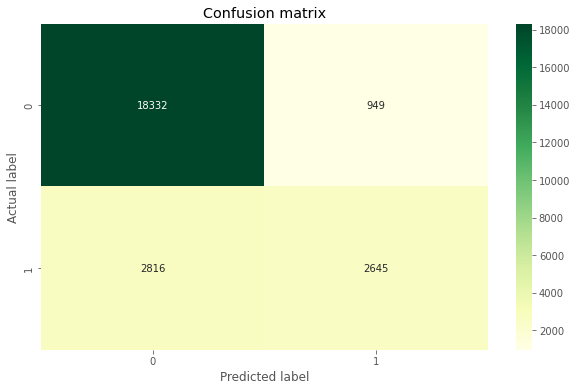

In [37]:
cmLR = confusion_matrix(y_test, y_predR)

plt.figure(figsize=(10,6))
p = sns.heatmap(pd.DataFrame(cmLR), annot=True, cmap="YlGn" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

#### SVM

In [38]:
# SVM
modelSvc = SVC(random_state=5)
modelSvc.fit(X_train, y_train)

# Prediksi hasil data testing
y_predSvc = modelSvc.predict(X_test)
print('Nilai akurasi Model SVM: ', accuracy_score(y_test, y_predSvc))
print('')
print(classification_report(y_test, y_predSvc))

Nilai akurasi Model SVM:  0.8564788618543367

              precision    recall  f1-score   support

           0       0.87      0.96      0.91     19281
           1       0.79      0.48      0.59      5461

    accuracy                           0.86     24742
   macro avg       0.83      0.72      0.75     24742
weighted avg       0.85      0.86      0.84     24742



Text(0.5, 33.0, 'Predicted label')

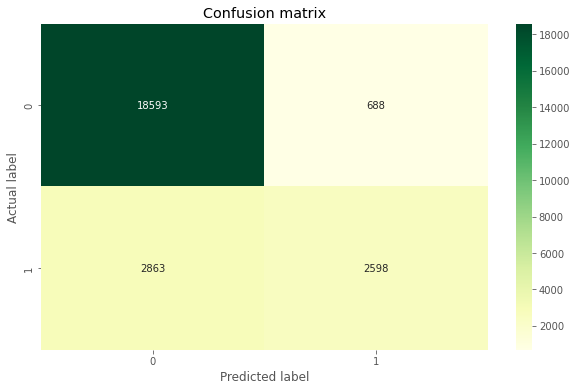

In [39]:
cmsvm = confusion_matrix(y_test, y_predSvc)

plt.figure(figsize=(10,6))
p = sns.heatmap(pd.DataFrame(cmsvm), annot=True, cmap="YlGn" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

## Feature Importance

In [40]:
# Memeriksa feature importance

feat_import = pd.DataFrame({'feature':list(df_final.columns),
                           'feature_importance':[abs(i) for i in modelR.coef_[0]]})
feat_import.head(10)

,feature,feature_importance
0,MinTemp,0.219106
1,Rainfall,0.082357
2,WindGustDir,0.037385
3,WindGustSpeed,0.995064
4,WindDir9am,0.124381
5,WindDir3pm,0.083827
6,WindSpeed9am,0.148784
7,WindSpeed3pm,0.292994
8,Humidity9am,0.058364
9,Humidity3pm,1.490313


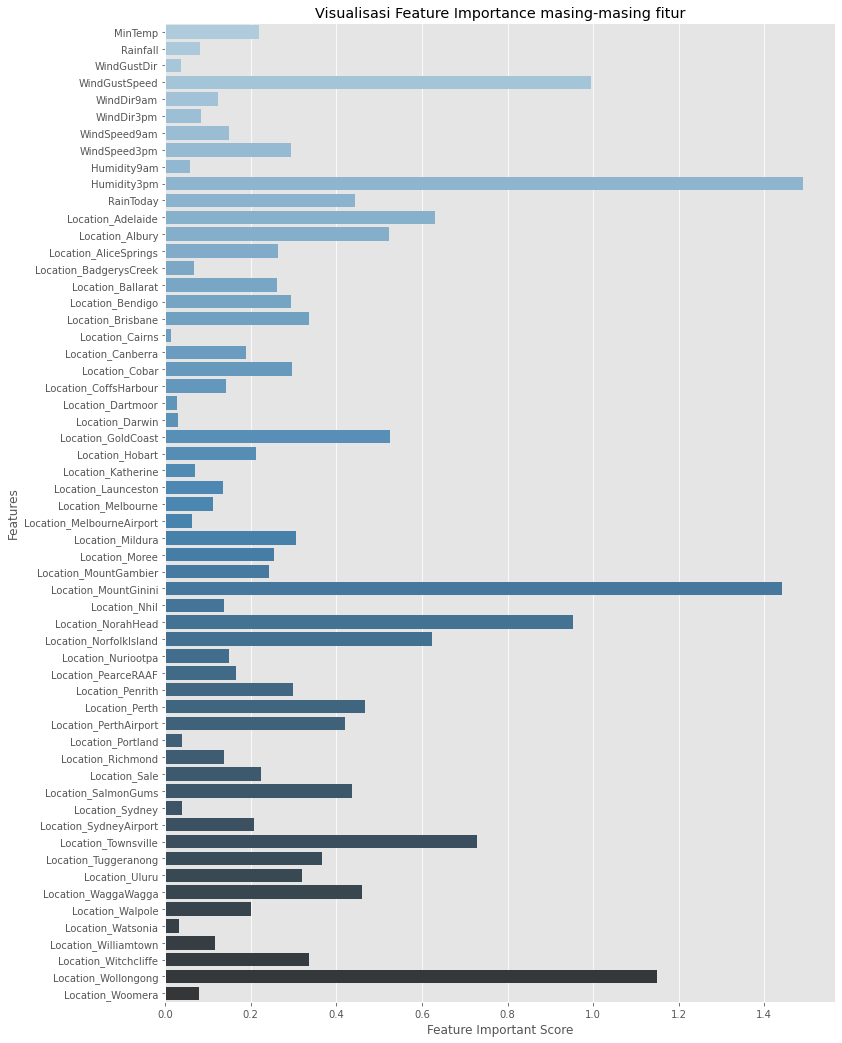

In [41]:
plt.figure(figsize=(12, 18))
sns.barplot(x=feat_import['feature_importance'], y=feat_import['feature'], palette="Blues_d")
plt.xlabel("Feature Important Score")
plt.ylabel("Features")
plt.title("Visualisasi Feature Importance masing-masing fitur")

plt.show()

In [42]:
# Memeriksa hasil probabilitas
modelR.predict_proba(X_test)

array([[0.93420558, 0.06579442],
       [0.97997574, 0.02002426],
       [0.97415597, 0.02584403],
       ...,
       [0.24480686, 0.75519314],
       [0.99390155, 0.00609845],
       [0.22110824, 0.77889176]])

## Model Inference

In [ ]:
# rslt_df = data[(data['RainToday'] == 0) & (data['RainTomorrow'] == 1) & (data['Location'] == 'Adelaide')]
# rslt_df

**Melakukan Pengujian**

**Hari ini hujan, besok tidak**<br>
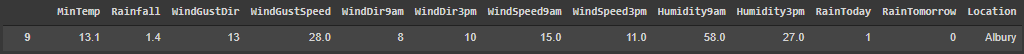

Hari ini tidak hujan, besok hujan
image.png

In [47]:
mintemp         = float(input("Minimum Temperature      : "))
rainfall        = float(input("Rainfall (in mm)         : "))
windgustdir     = float(input("High Wind Direction      : "))
windgustspeed   = float(input("High Wind Speed km/jam   : "))
windir9         = float(input("Wind Direction at 9 AM   : "))
windir3         = float(input("Wind Direction at 3 PM   : "))
windspeed9      = float(input("Wind Speed at 9 AM       : "))
windspeed3      = float(input("Wind Speed at 3 PM       : "))
humidity9       = float(input("Humidity at 9 AM         : "))
humidity3       = float(input("Humidity at 3 PM         : "))
raintoday       = int(input('Is today raining? 1 = Yes, 0 = No '))
location        = input('Your Location :')
metode          = input('Metode Apa yang akan digunakan: ')

print('')

val = [mintemp, rainfall, windgustdir, windgustspeed, windir9, windir3, windspeed9, windspeed3, humidity9, humidity3]
val = sc.transform([val])
val = val.reshape(10,)

if raintoday == 1:
    val = np.append(val, 1)
elif raintoday == 0:
    val = np.append(val, 0)
else:
    print('ERROR!')

locations = {"Adelaide":0, "Albury":1, "AliceSprings":2, "Badgerys Creek":3,"Ballarat":4,"Bendigo":5,
            "Brisbane":6, "Cairns":7, "Canberra":8, "Cobar":9, "Coffs Harbour":10, 
            "Dartmoor":11, "Darwin":12, "Gold Coast":13, "Hobart":14, "Katherine":15, 
            "Launceston":16, "Melbourne":17, "Melbourne Airport":18, "Mildura":19, "Moree":20,
            "Mount Gambier":21, "Mount Ginini":22, "Nhil":23, "Norah Head":24, "Norfolk Island":25, 
            "Nuriootpa":26, "Pearce RAAF":27, "Perth":28, "Perth Airport":29, "Portland":30,
            "Richmond":31, "Sale":32, "Sydney":33, "Sydney Airport":34, "Townsville":35, 
            "Tuggeranong":36, "Uluru":37, "Wagga Wagga":38, "Walpole":39, "Watsonia":40, 
            "Williamtown":41, "Witchcliffe":42, "Wollongong":43, "Woomera":44}

for i in range(0,47):
    if locations[location]==i:
        val = np.append(val, 1)
    else:
        val = np.append(val, 0)

print(val)

if metode == 'Logistic Regression':
    val_predict = modelR.predict([val])
elif metode ==  'Support Vector Machine':
    val_predict = modelSvc.predict([val])
else:
    print('ERROR!')

print('')
if val_predict == 1:
    print('Prediksi adalah 1, yang berarti diprediksi bahwa besok akan turun hujan untuk kota', location)
elif val_predict == 0:
    print('Prediksi adalah 0, yang berarti diprediksi bahwa besok tidak akan turun hujan untuk kota', location)
else:
    print('Error!')

Minimum Temperature      : 11.8
Rainfall (in mm)         : 0
High Wind Direction      : 15
High Wind Speed km/jam   : 31
Wind Direction at 9 AM   : 5
Wind Direction at 3 PM   : 12
Wind Speed at 9 AM       : 7
Wind Speed at 3 PM       : 17
Humidity at 9 AM         : 81
Humidity at 3 PM         : 77
Is today raining? 1 = Yes, 0 = No 0
Your Location :Adelaide
Metode Apa yang akan digunakan: Logistic Regression

[-0.09674775 -0.2785717   1.55902931 -0.72339852 -0.49861626  0.9151565
 -0.96442115 -0.25371328  0.69611198  1.25034572  0.          1.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.         

## Save Model

In [43]:
pickle_file_dir = open("modelLR.pkl", "wb")

pickle.dump(modelR, pickle_file_dir)
pickle_file_dir.close()

In [44]:
pickle_file_dir = open("modelSvc.pkl", "wb")

pickle.dump(modelSvc, pickle_file_dir)
pickle_file_dir.close()

In [45]:
pickle_file_dir = open("scaler.pkl", "wb")

pickle.dump(sc, pickle_file_dir)
pickle_file_dir.close()

## Conclusion

Hasil analisis keseluruhan:

1. Project ini membahas tentang penerapan algoritma Supervised Machine Learning untuk kasus Classification. Algoritma model klasifikasi yang digunakan adalah Logistic Regression dan Support Vector Machine (SVM). 

2. Project ini bertujuan untuk mengevaluasi dan menerapkan konsep Logistic Regression dan SVM pada kasus klasifikasi menggunakan metode machine learning. Data yang digunakan berisi dokumentasi kondisi cuaca di Australia selama 10 tahun. Kolom `RainTomorrow` akan digunakan sebagai data target untuk melakukan prediksi. Jadi, objektif dari project ini adalah berdasarkan hasil observasi kondisi cuaca pada hari itu, dan akan memprediksi apakah besoknya akan turun hujan (Yes) atau tidak (No).

3. Lokasi Adelaide adalah lokasi yang memiliki intensitas curah hujan tertinggi.

4. Model SVM memiliki performa yang baik dan tidak terdapat perbedaan secara signifikan dengan performa model yang dibangun menggunakan metode Logistic Regression. Namun SVM cenderung memakan waktu lebih lama dalam proses training model. Sehingga berdasarkan pelatihan model yang sudah dilakukan, algoritma yang dipilih adalah LogisticRegression. Nilai accuracy dari kedua metode tidak jauh berbeda. LR memiliki nilai accuracy sebesar 85%, sedangkan SVM 86%